# Groupby operations

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Some 'theory': the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [3]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


In [4]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


And many more methods are available. 

## And now applying this on some real data

We go back to the titanic survival data:

In [5]:
df = pd.read_csv("data/titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), calculate the average age for each sex.
</div>

In [7]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the average survival ratio for all passengers.
</div>

In [8]:
df['Survived'].sum() / len(df['Survived'])

0.38383838383838381

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).
</div>

In [9]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.41196013289036543

<div class="alert alert-success">
    <b>EXERCISE</b>: Is there a difference in this survival ratio between the sexes? (tip: write the above calculation of the survival ratio as a function)
</div>

In [10]:
def survival_ratio(survived):
    return survived.sum() / len(survived)

In [11]:
df.groupby('Sex')['Survived'].aggregate(survival_ratio)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Make a bar plot of the survival ratio for the different classes ('Pclass' column).
</div>

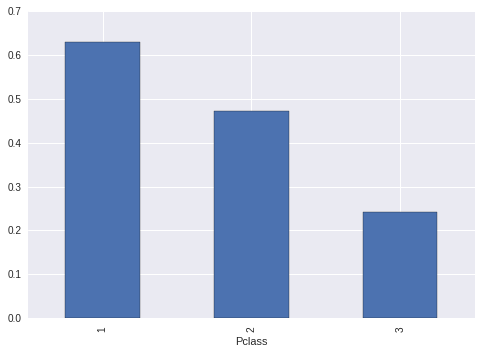

In [12]:
df.groupby('Pclass')['Survived'].aggregate(survival_ratio).plot(kind='bar')

If you are ready, more groupby exercises can be found in the "Advanded groupby operations" notebook.